In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [158]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

* **PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.**
* **HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.**
* **CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.**
* **Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.**
* **Destination - The planet the passenger will be debarking to.**
* **Age - The age of the passenger.**
* **VIP - Whether the passenger has paid for special VIP service during the voyage.**
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.**
* **Name - The first and last names of the passenger.**
* **Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.**

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [160]:
train.shape

(8693, 14)

In [161]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [162]:
test.shape

(4277, 13)

In [163]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


**Missing Value check**

In [164]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [165]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [166]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [167]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# **2. Data Transfrom**

In [168]:
# Transform for data visualization

train[['Deck','Num','Side']]= train['Cabin'].str.split('/',expand=True,)
test[['Deck','Num','Side']]= train['Cabin'].str.split('/',expand=True,)

train= train[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Deck', 'Num', 'Side', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']]

test= test[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Deck', 'Num', 'Side', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']]


In [169]:
# Fill in missing values
train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

train['Age'] =train['Age'].fillna(train['Age'].median())
test['Age'] =test['Age'].fillna(test['Age'].median())

train['VIP'] =train['VIP'].fillna(False)
test['VIP'] =test['VIP'].fillna(False)

train['HomePlanet'] =train['HomePlanet'].fillna('Mars')
test['HomePlanet'] =test['HomePlanet'].fillna('Mars')

train['Destination']=train['Destination'].fillna("PSO J318.5-22")
test['Destination']=test['Destination'].fillna("PSO J318.5-22")

train['CryoSleep'] =train['CryoSleep'].fillna(False)
test['CryoSleep'] =test['CryoSleep'].fillna(False)

In [170]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Deck            199
Num             199
Side            199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

**Data Check**

In [171]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Deck,Num,Side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# **3. Data Visualization**

In [172]:
num_cols = train.select_dtypes(exclude = ['object','bool'])
cat_cols = train.select_dtypes(include = ['object'])

cat_cols.drop(['PassengerId','Cabin','Num','Name'], axis=1, inplace=True)

**Histogram**

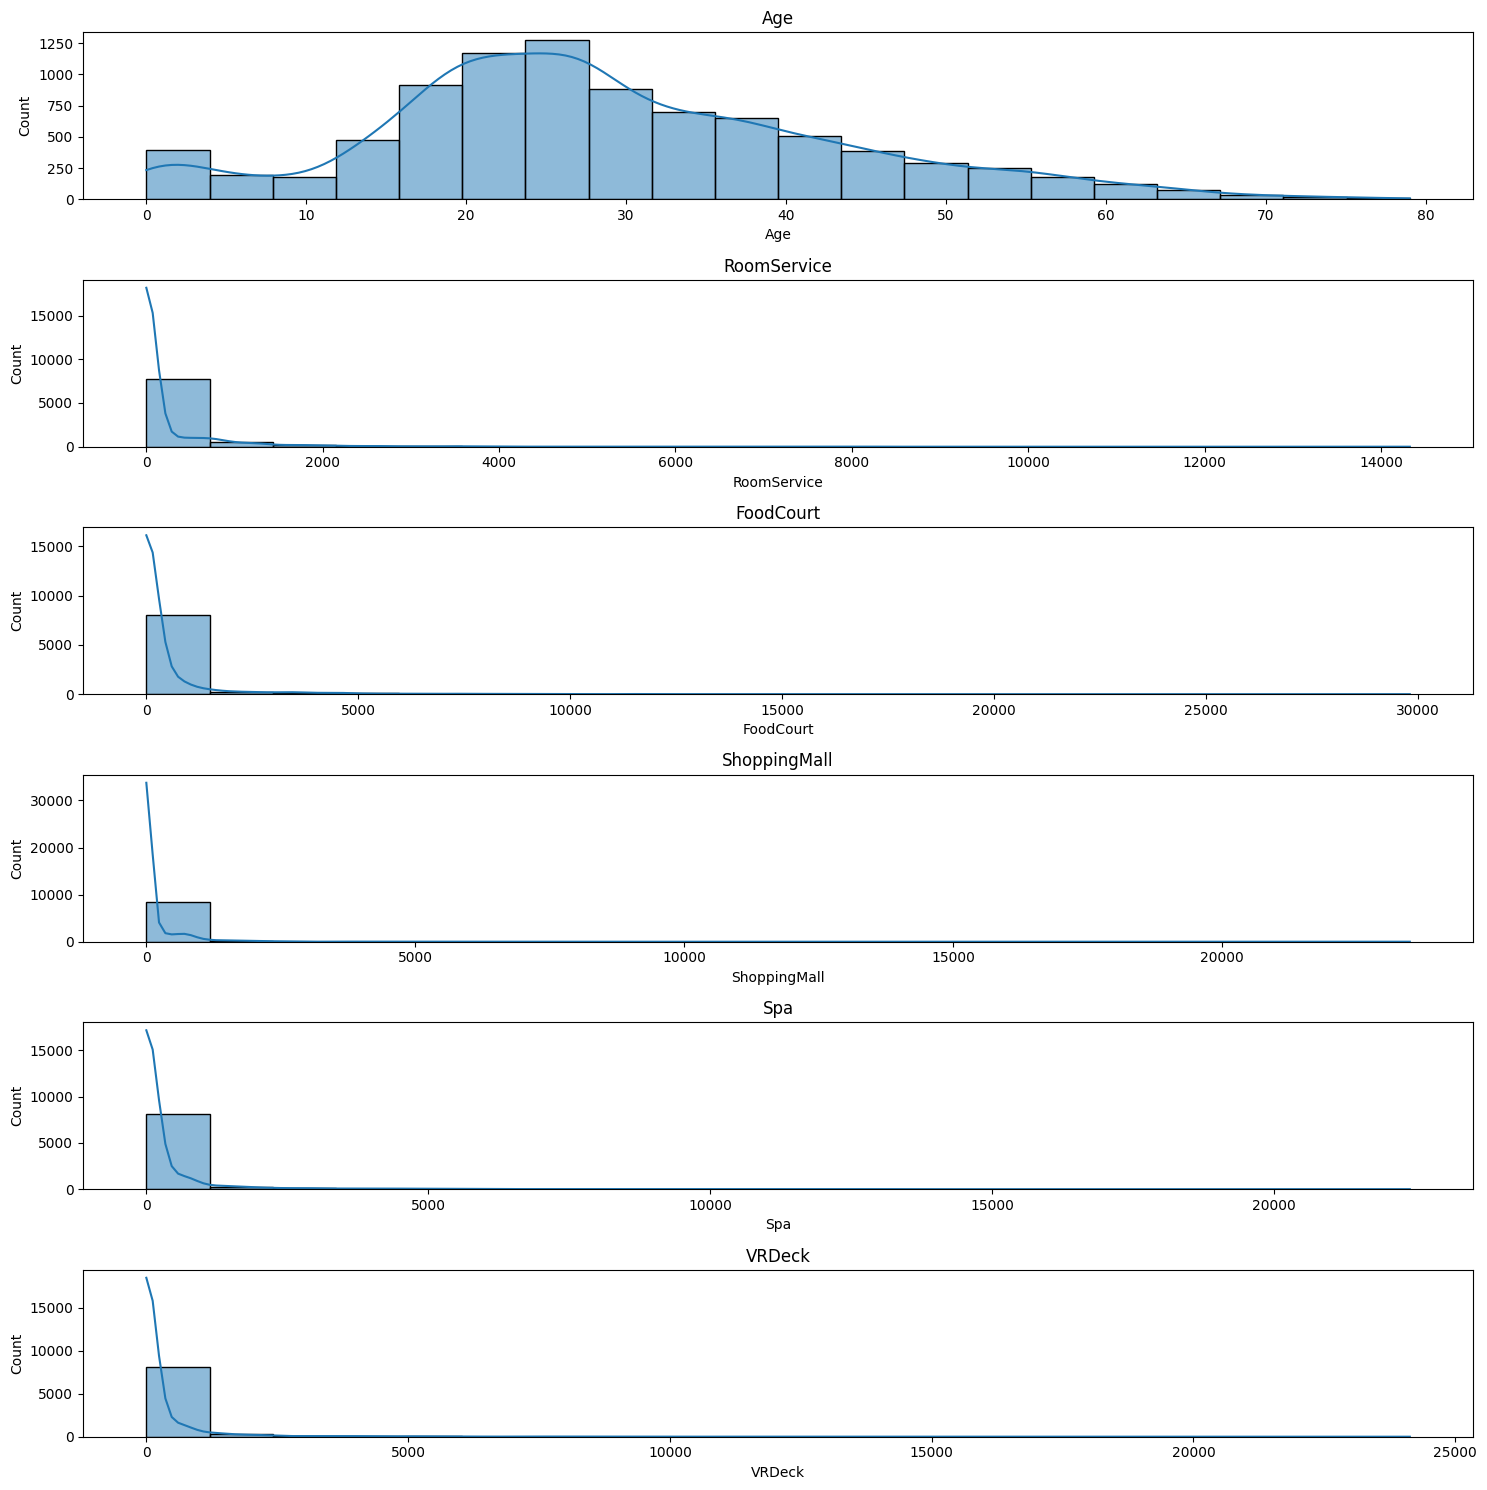

In [173]:
f, ax = plt.subplots(6,1, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data= train, x= cols, ax = ax[index],kde=True, bins= 20)
    ax[index].set_title(cols)
    
plt.tight_layout()
plt.show()   

------------

**Conut by cat_cols**

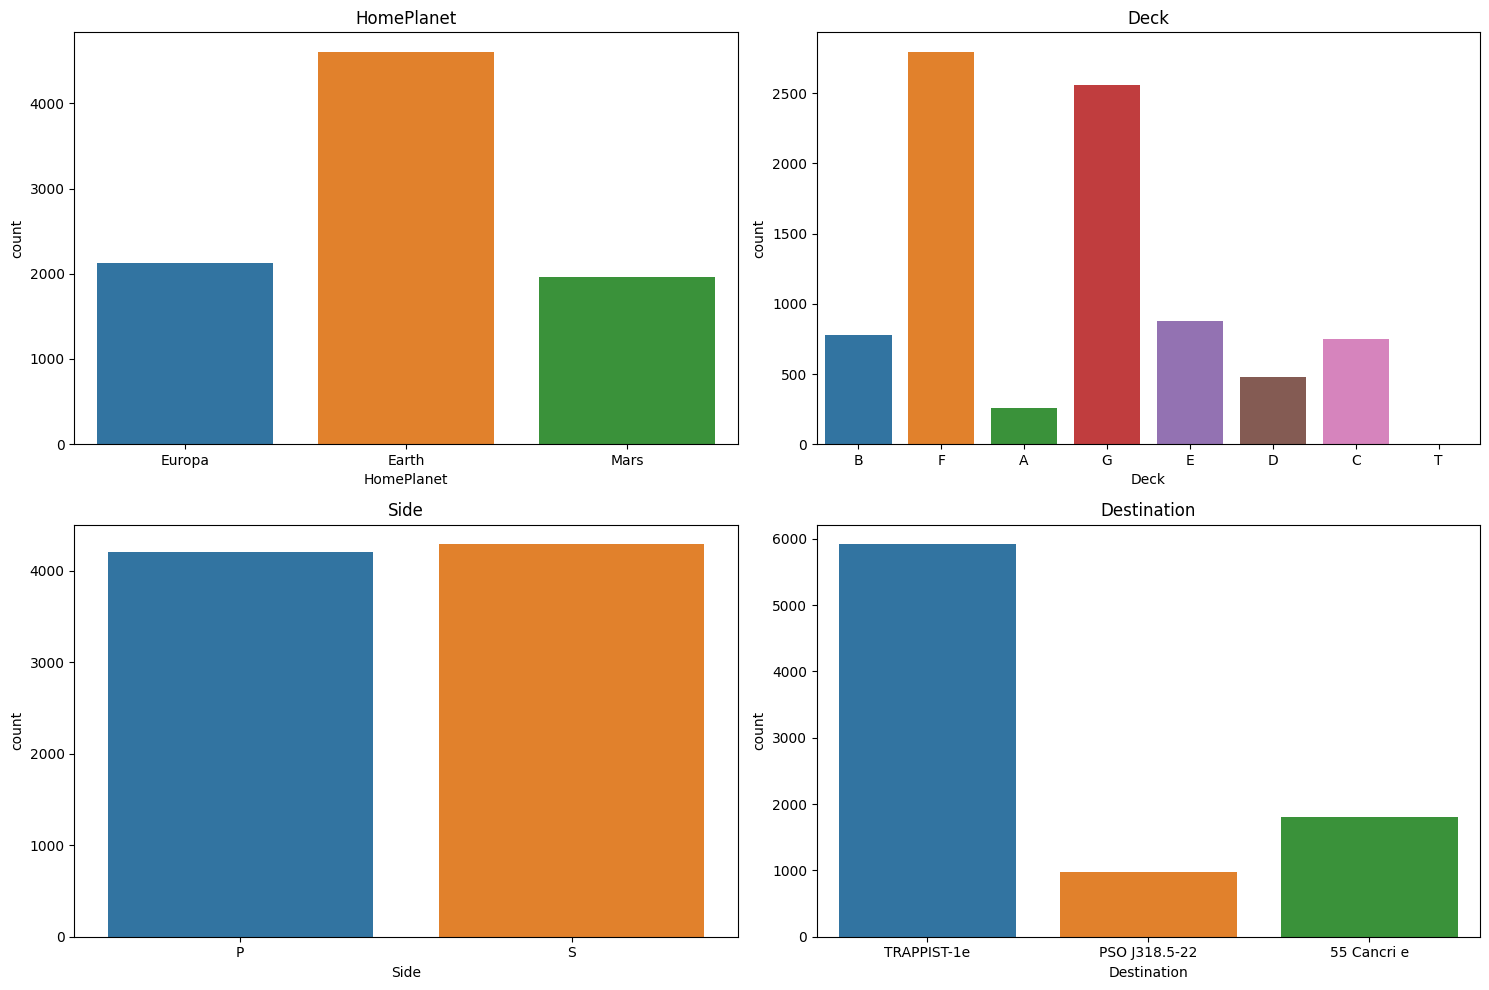

In [174]:
f, ax = plt.subplots(2,2, figsize=(15, 10))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= train, x= cols, ax = ax[index])
    ax[index].set_title(cols)
      

plt.tight_layout()
plt.show()   

--------------

**Correlation**

In [175]:
num_cols_name = num_cols.columns

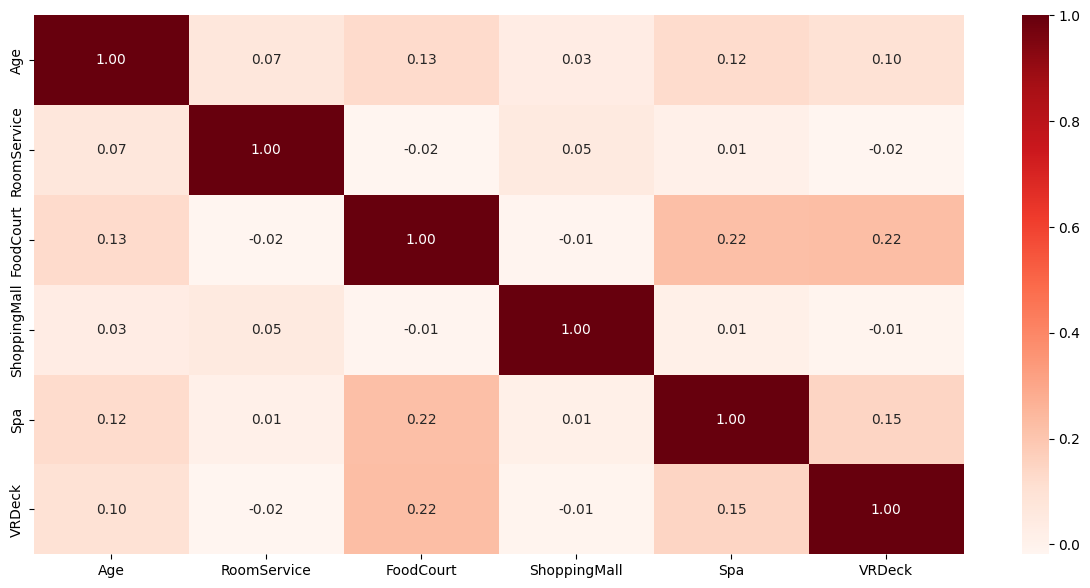

In [176]:
plt.figure(figsize=(15,7))
sns.heatmap(train[num_cols_name].corr(),annot=True, fmt = '.2f',cmap='Reds')
plt.show()

----------------

**cat_cols by Transported**

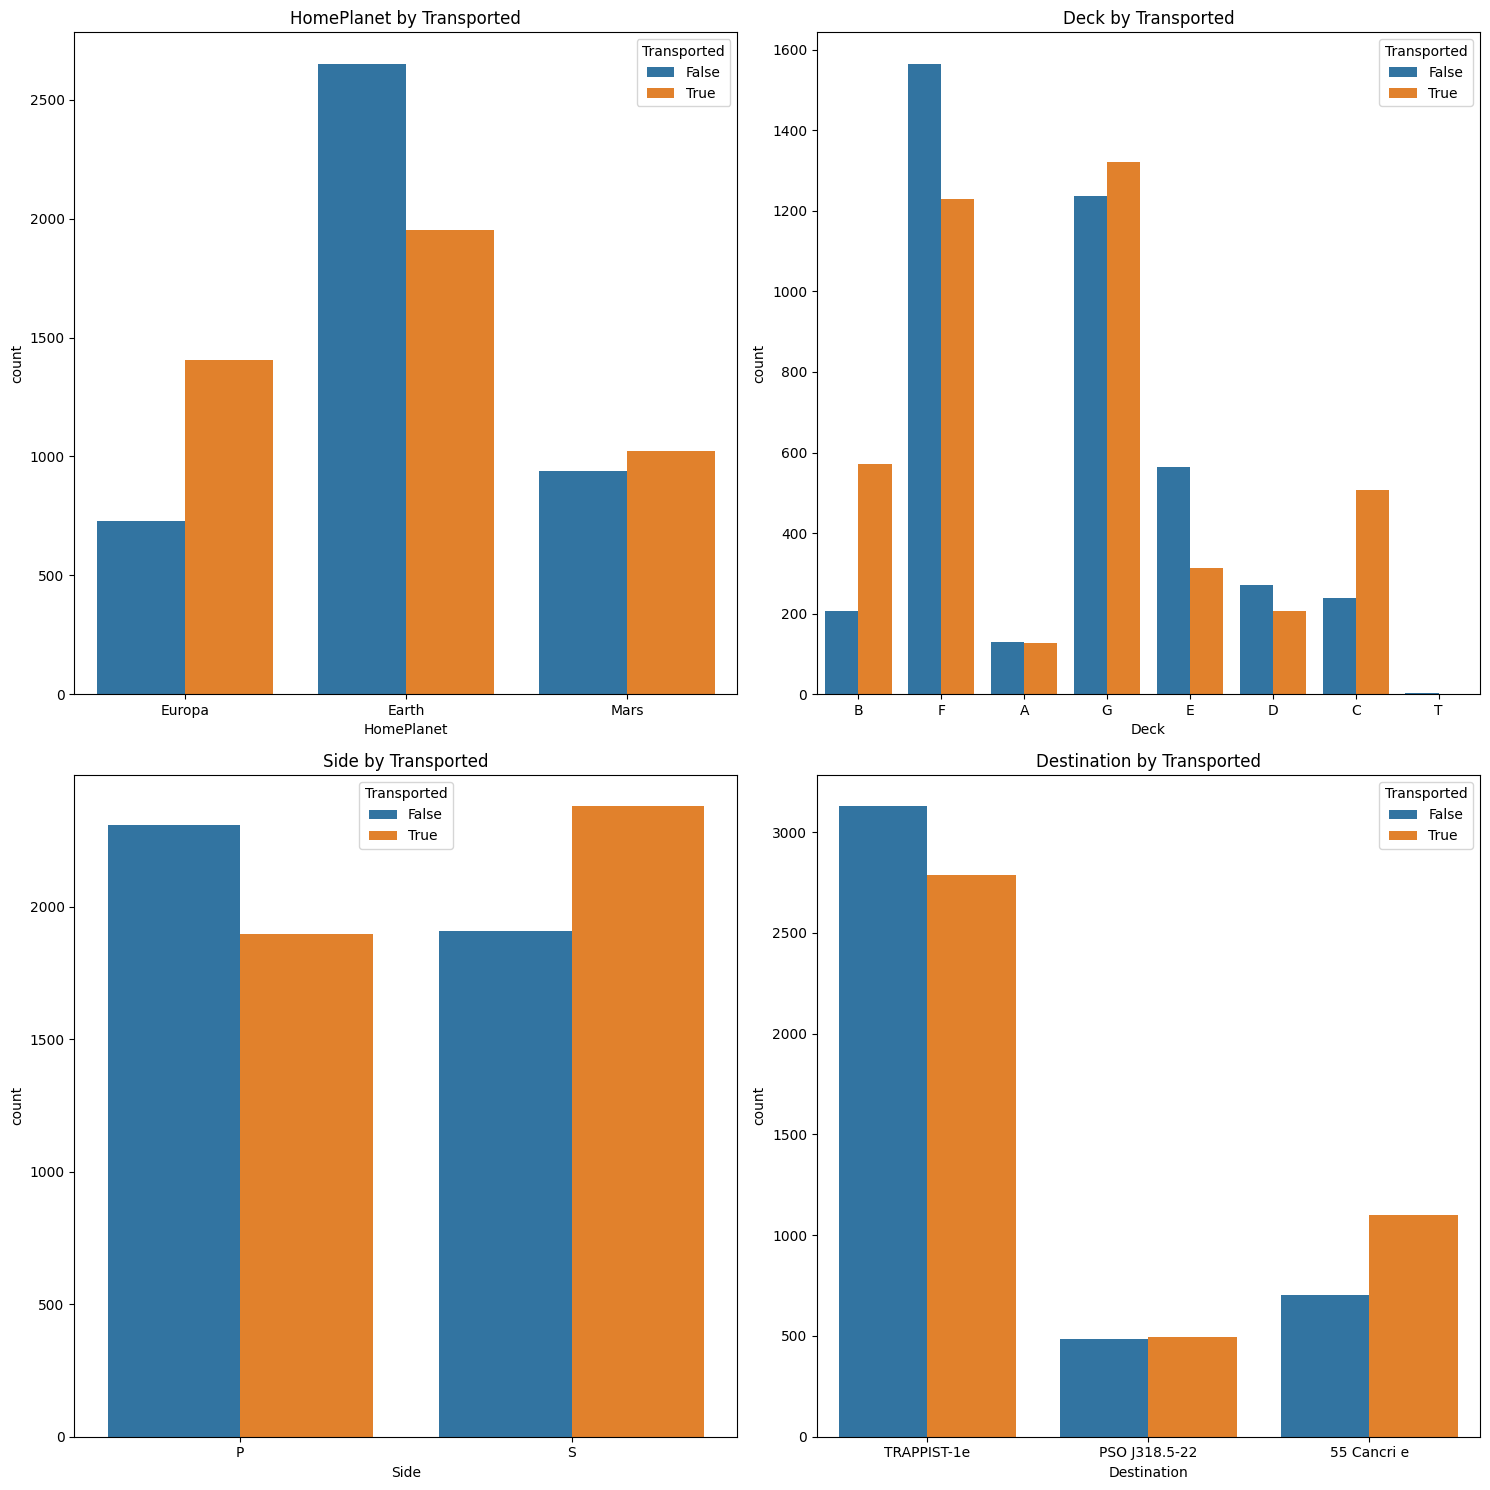

In [177]:
f, ax = plt.subplots(2,2, figsize=(15, 15))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data = train,x = cols ,hue= 'Transported', ax = ax[index])
    ax[index].set_title(f'{cols} by Transported')
      

plt.tight_layout()
plt.show() 

--------------

# **4. Modeling**

**Import**

In [178]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

**Data processing for Medeling**

In [179]:
cat_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']

In [180]:
for i in cat_cols:
    LE = LabelEncoder()
    arr = np.concatenate((train[i], test[i])).astype(str)
    LE.fit(arr)
    train[i] = LE.transform(train[i].astype(str))
    test[i] = LE.transform(test[i].astype(str))

In [181]:
train = train.drop(['Name','Cabin','PassengerId'],axis=1)
test = test.drop(['Name','Cabin', 'PassengerId'],axis=1)

In [182]:
train['Transported'] = train['Transported'].replace({True:1,False:0})

In [183]:
X = train.drop('Transported',axis=1)
y = train['Transported']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

In [185]:
RF = RandomForestClassifier(random_state=42)
LGR = LogisticRegression()
KNN = KNeighborsClassifier()
SVM = SVC()

--------------

**RandomForestClassifier**

In [186]:
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [187]:
pred_RF = RF.predict(X_test)

In [188]:
confusion_matrix(y_test,pred_RF)

array([[869, 213],
       [250, 842]])

In [189]:
print(f'accuracy : {accuracy_score(y_test,pred_RF)}')

accuracy : 0.7870285188592456


--------------

**Logistic Regression**

In [190]:
LGR.fit(X_train, y_train)

LogisticRegression()

In [191]:
pred_LGR = LGR.predict(X_test)

In [192]:
confusion_matrix(y_test,pred_LGR)

array([[799, 283],
       [218, 874]])

In [193]:
print(f'accuracy : {accuracy_score(y_test,pred_LGR)}')

accuracy : 0.7695492180312787


---------------

**KNeighborsClassifier**

In [194]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [195]:
pred_KNN = KNN.predict(X_test)

In [196]:
confusion_matrix(y_test,pred_KNN)

array([[778, 304],
       [233, 859]])

In [197]:
print(f'accuracy : {accuracy_score(y_test,pred_KNN)}')

accuracy : 0.7529898804047838


--------------

**Support Vector Machine**

In [198]:
SVM.fit(X_train, y_train)

SVC()

In [199]:
pred_SVM = SVM.predict(X_test)

In [200]:
confusion_matrix(y_test,pred_SVM)

array([[731, 351],
       [126, 966]])

In [201]:
print(f'accuracy : {accuracy_score(y_test,pred_SVM)}')

accuracy : 0.7805887764489421


---------------

# **5. Evaluation**

**Bestmodel is RandomForestclassifier Model. Because, Accuracy more than others**

------------------

In [228]:
pred = RF.predict(test)

In [227]:
sample = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [229]:
id = sample['PassengerId']

In [230]:
output = pd.DataFrame({'PassengerId': id, 'Transported': pred})

In [231]:
output['Transported'] = output['Transported'].map({0: 'False', 1: 'True'})

In [232]:
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [233]:
output.to_csv('submission.csv', index=False)

**please leave it in the comments. Thankyou.**